<a href="https://colab.research.google.com/github/Ramanarayanan/DeepLearningAndGenerativeAi/blob/main/Nifty_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
Mean Squared Error: 8375.369152301872


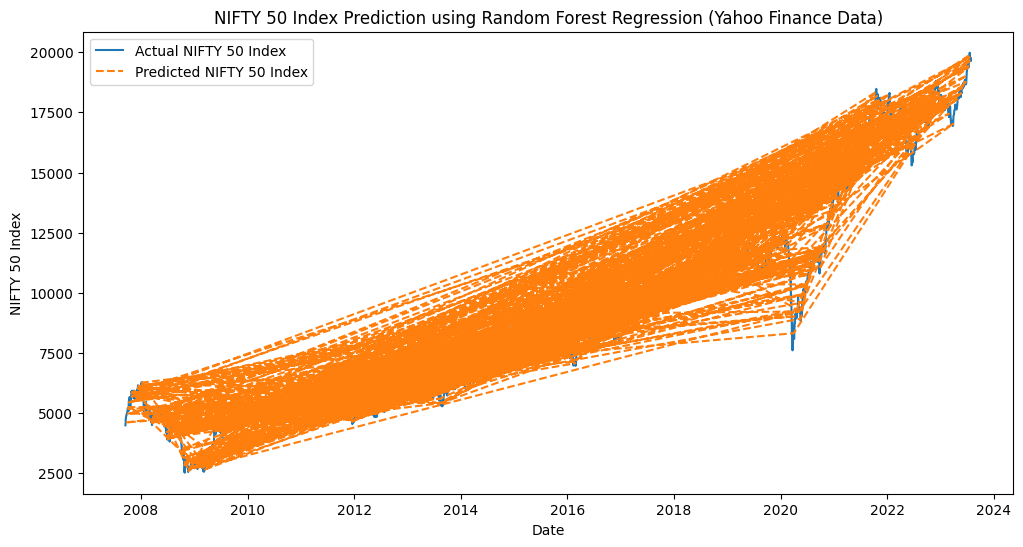

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Step 2: Fetch NIFTY 50 index data from Yahoo Finance
nifty_data = yf.download('^NSEI', start='1998-01-01', end='2023-07-29')

# Step 3: Preprocess the data (if required)
# In this example, data preprocessing is not required as Yahoo Finance data is usually clean

# Step 4: Split the data into training and testing sets
X = np.arange(len(nifty_data)).reshape(-1, 1)  # Use index as the feature
y = nifty_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose a regression algorithm and train it on the data
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Step 6: Make predictions using the trained model
y_pred = regressor.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
joblib.dump(regressor, 'nifty_model.joblib')
# Step 7: Plot the actual data and the predicted values on a chart
plt.figure(figsize=(12, 6))
plt.plot(nifty_data.index, nifty_data['Close'], label='Actual NIFTY 50 Index')
plt.plot(nifty_data.index[X_test.flatten()], y_pred, label='Predicted NIFTY 50 Index', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('NIFTY 50 Index')
plt.title('NIFTY 50 Index Prediction using Random Forest Regression (Yahoo Finance Data)')
plt.legend()
plt.show()


# New Section